In [1]:
# Generate your regression and classification models using the training data. We expect that within this process, you'll be making use of:
# train-test split
# cross-validation / grid searching for hyperparameters
# strong exploratory data analysis to question correlation and relationship across predictive variables
# code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
# Predict the values for your target columns in the test dataset and submit your predictions to Kaggle to see how your model does against unknown data.

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
#Import the packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
%matplotlib inline

In [78]:
#import the data file
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [7]:
print(df.shape,test.shape)

(2051, 82) (879, 80)


In [8]:
train_ID = df['Id']
train_PID = df['PID']

In [9]:
del df['Id']

In [10]:
del df['PID']

In [11]:
df.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [12]:
df.shape

(2051, 80)

 SalePrice Mean:  181469.70160897123 
 SalePrice Std Dev:  79258.65935236562


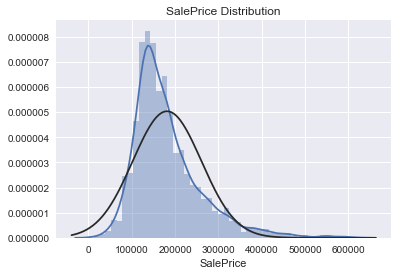

In [13]:
y = df['SalePrice']
sns.distplot(y,fit=norm)
sns.plt.title('SalePrice Distribution')
print(' SalePrice Mean: ',y.mean(),'\n','SalePrice Std Dev: ',y.std())

In [14]:
corr=df.corr()
#get features corr_coef > 0.5 with SalePrice
high_corr=corr.index[abs(corr['SalePrice'])>0.5]
high_corr_col=df[high_corr]

In [15]:
high_corr_col.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'SalePrice'],
      dtype='object')

Correlation heatmap of highly correlated features

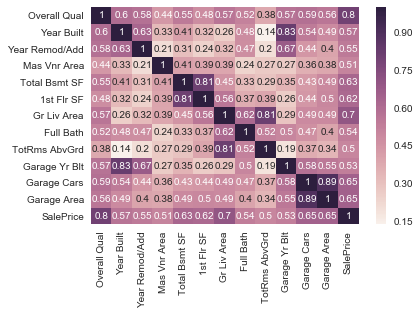

In [16]:
sns.heatmap(high_corr_col.corr(),annot=True)

In [17]:
high_corr_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 13 columns):
Overall Qual      2051 non-null int64
Year Built        2051 non-null int64
Year Remod/Add    2051 non-null int64
Mas Vnr Area      2029 non-null float64
Total Bsmt SF     2050 non-null float64
1st Flr SF        2051 non-null int64
Gr Liv Area       2051 non-null int64
Full Bath         2051 non-null int64
TotRms AbvGrd     2051 non-null int64
Garage Yr Blt     1937 non-null float64
Garage Cars       2050 non-null float64
Garage Area       2050 non-null float64
SalePrice         2051 non-null int64
dtypes: float64(5), int64(8)
memory usage: 208.4 KB


In [18]:
high_corr_col[['SalePrice']]=high_corr_col[['SalePrice']].astype(float)

In [19]:
from sklearn.preprocessing import Imputer
impute = Imputer(strategy='mean')
impute.fit(high_corr_col['Mas Vnr Area'].values.reshape(-1, 1))
high_corr_col['Mas Vnr Area']=impute.transform(high_corr_col['Mas Vnr Area'].values.reshape(-1, 1))

In [20]:
impute.fit(high_corr_col['Total Bsmt SF'].values.reshape(-1, 1))
high_corr_col['Total Bsmt SF']=impute.transform(high_corr_col['Total Bsmt SF'].values.reshape(-1, 1))

In [21]:
impute.fit(high_corr_col['Garage Cars'].values.reshape(-1, 1))
high_corr_col['Garage Cars']=impute.transform(high_corr_col['Garage Cars'].values.reshape(-1, 1))

In [22]:
impute.fit(high_corr_col['Garage Area'].values.reshape(-1, 1))
high_corr_col['Garage Area']=impute.transform(high_corr_col['Garage Area'].values.reshape(-1, 1))

In [23]:
del high_corr_col['Garage Yr Blt']

In [24]:
high_corr_col.isnull().sum()[high_corr_col.isnull().sum() > 0]

Series([], dtype: int64)

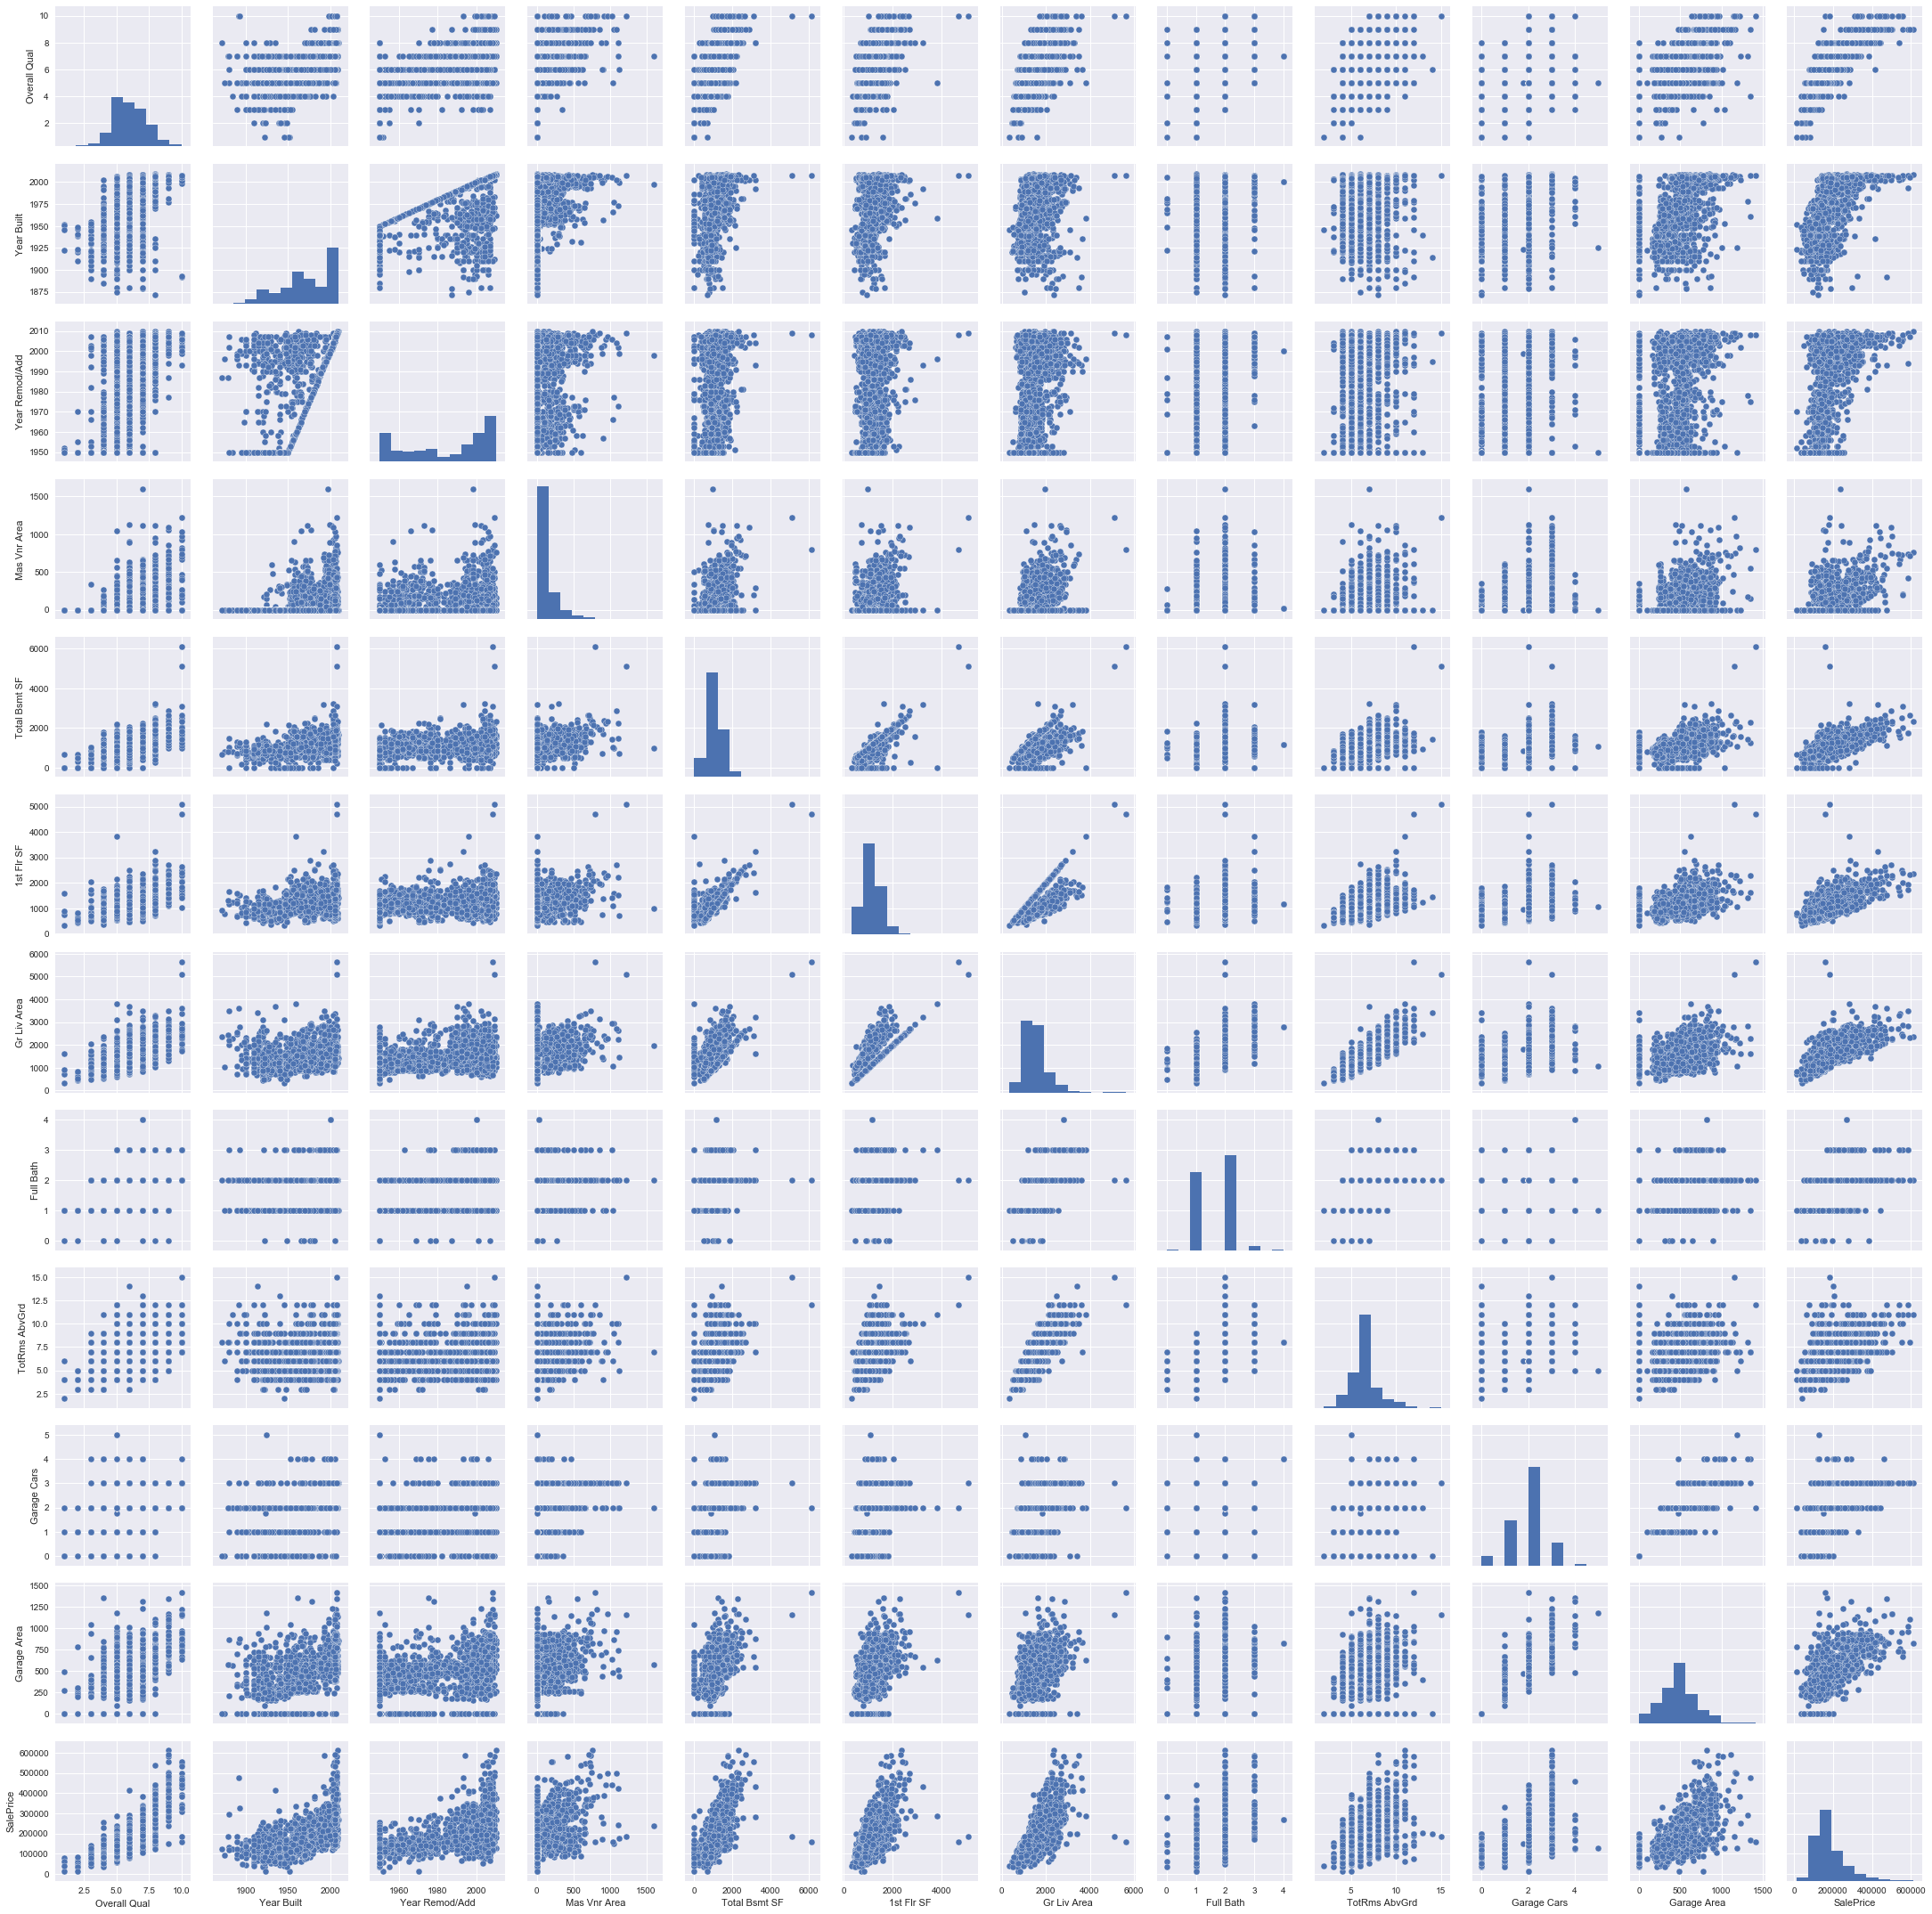

In [25]:
sns.pairplot(high_corr_col)

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(high_corr_col)
ss.transform(high_corr_col)


array([[-0.0786441 ,  0.14222744,  0.98947881, ...,  0.29236458,
         0.00615437, -0.64323737],
       [ 0.62265614,  0.80512594,  0.60909015, ...,  0.29236458,
         0.39535092,  0.48625217],
       [-0.77994434, -0.62010583,  1.08457597, ..., -1.01625417,
        -1.05486955, -0.91456726],
       ..., 
       [-0.0786441 , -1.44872896, -1.62569321, ...,  0.29236458,
        -0.6100735 , -0.05640761],
       [-1.48124458, -0.52067106, -1.34040172, ..., -1.01625417,
        -0.83247153, -0.47286744],
       [ 0.62265614,  0.90456072,  0.70418731, ...,  0.29236458,
        -0.14674428,  0.09503233]])

In [27]:
ss_col=pd.DataFrame()

In [28]:
ss_col[high_corr_col.columns]=pd.DataFrame(ss.transform(high_corr_col))

In [29]:
ss_col.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Cars,Garage Area,SalePrice
0,-0.078644,0.142227,0.989479,1.088084,-0.741305,-1.108838,-0.040634,0.769779,-0.279441,0.292365,0.006154,-0.643237
1,0.622656,0.805126,0.609090,0.185678,-0.322775,-0.634510,1.244529,0.769779,1.002738,0.292365,0.395351,0.486252
2,-0.779944,-0.620106,1.084576,-0.573033,-0.002199,-0.271195,-0.884084,-1.051232,-0.920531,-1.016254,-1.054870,-0.914567
3,-0.779944,1.136575,1.084576,-0.573033,-1.500446,-1.060900,-0.110588,0.769779,0.361648,0.292365,-0.341343,-0.094268
4,-0.078644,-2.376787,0.418896,-0.573033,-0.850390,-0.841397,-0.108589,0.769779,-0.279441,0.292365,0.047854,-0.542277


In [30]:
y=ss_col[['SalePrice']].copy()
X=ss_col[[col for col in ss_col.columns if col != 'SalePrice']].copy()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.33,random_state=200)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1374, 11) (677, 11) (1374, 1) (677, 1)


In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lr = LinearRegression()
scores=cross_val_score(lr, X_train, y_train, cv=5)
predictions = cross_val_predict(lr, X_train, y_train, cv=5)

In [34]:
print(scores.mean(),scores.std())

0.846192389909 0.0105434860318


In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, predictions)

0.16909790283675724

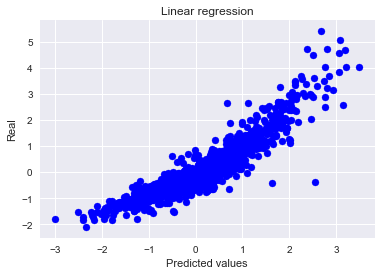

In [36]:
#plot between predicted values and residuals
plt.scatter(predictions, y_train, c = "blue")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real")
plt.legend(loc = "upper left")
plt.show()

In [37]:
cross_val_score(lr, X_test, y_test, cv=5)

array([ 0.77743167,  0.80119252, -0.00134029,  0.70917959,  0.80455897])

In [38]:
X.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [39]:
X_testset=pd.DataFrame()
for i in test.columns:
    if i in X.columns:
        X_testset[i]=test[i]

In [40]:
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 11 columns):
Overall Qual      879 non-null int64
Year Built        879 non-null int64
Year Remod/Add    879 non-null int64
Mas Vnr Area      878 non-null float64
Total Bsmt SF     879 non-null float64
1st Flr SF        879 non-null int64
Gr Liv Area       879 non-null int64
Full Bath         879 non-null int64
TotRms AbvGrd     879 non-null int64
Garage Cars       879 non-null float64
Garage Area       879 non-null float64
dtypes: float64(4), int64(7)
memory usage: 75.6 KB


In [41]:
from sklearn.preprocessing import Imputer
impute = Imputer(strategy='mean')
impute.fit(X_testset['Mas Vnr Area'].values.reshape(-1, 1))
X_testset['Mas Vnr Area']=impute.transform(X_testset['Mas Vnr Area'].values.reshape(-1, 1))

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.84938108001
0.586992028232


In [43]:
predict_on_test=lr.predict(X_testset)

In [44]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [45]:
reg_score=pd.DataFrame()
reg_score['Id']=test['Id']
reg_score['SalePrice']=predict_on_test

In [46]:
reg_score.to_csv('reg_score.csv',index=False)

In [47]:
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X, y, cv=10)

print(linreg_scores)
print(np.mean(linreg_scores))

[ 0.77905767  0.84495985  0.84254329  0.84956684  0.54670397  0.83374436
  0.85206715  0.83857246  0.80529845  0.6395183 ]
0.783203233643


In [48]:
y=high_corr_col['SalePrice']

In [49]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(X, y)
print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1366.08093839
1.0


..............................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.4s finished


In [50]:
elastic_y=optimal_enet.predict(X_testset)

In [51]:
elastic_score=pd.DataFrame()
elastic_score['Id']=test['Id']
elastic_score['SalePrice']=predict_on_test
elastic_score.to_csv('elastic_score.csv',index=False)

In [146]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
full = train.append(test, ignore_index=True)

In [147]:
train.shape

(2051, 82)

In [148]:
full.shape

(2930, 82)

In [149]:
total = full.isnull().sum().sort_values(ascending=False)
percent = (full.isnull().sum()/full.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0.2]

,Total,Percent
Pool QC,2917,0.995563
Misc Feature,2824,0.963823
Alley,2732,0.932423
Fence,2358,0.804778
Fireplace Qu,1422,0.485324
SalePrice,879,0.300000
Sale Condition,879,0.300000


In [150]:
train_labels = train.pop('SalePrice')
features = pd.concat([train, test], keys=['train', 'test'])

In [151]:
features.drop(['Pool QC', 'Misc Feature', 'Fireplace Qu', 'Fence', 'Alley'],
              axis=1, inplace=True)
features.shape

(2930, 76)

In [152]:
features.isnull().sum().sort_values(ascending=False).head(23)

Sale Condition    879
Lot Frontage      490
Garage Qual       159
Garage Finish     159
Garage Cond       159
Garage Yr Blt     159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Cond          80
Bsmt Qual          80
BsmtFin Type 1     80
Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Area         1
Electrical          1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Cars         1
Total Bsmt SF       1
dtype: int64

In [153]:
features['Sale Condition'] = features['Sale Condition'].fillna(features['Sale Condition'].mode()[0])
features['Lot Frontage'] = features['Lot Frontage'].fillna(features['Lot Frontage'].mean())
for col in ('Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'):
    features[col] = features[col].fillna('NoGRG')


In [157]:
features['Garage Cars'] = features['Garage Cars'].fillna(0.0)
features['Garage Area'] = features['Garage Area'].fillna(0.0)
features.drop(['Total Bsmt SF',  'Garage Yr Blt'], axis=1, inplace=True)

In [160]:
features['BsmtFin SF 1'] = features['BsmtFin SF 1'].fillna(0)   
features['BsmtFin SF 2'] = features['BsmtFin SF 2'].fillna(0)  

In [163]:
features['Bsmt Full Bath'] = features['Bsmt Full Bath'].fillna(features['Bsmt Full Bath'].median())
features['Bsmt Half Bath'] = features['Bsmt Half Bath'].fillna(features['Bsmt Half Bath'].median())

In [165]:
features['Bsmt Unf SF'] = features['Bsmt Unf SF'].fillna(features['Bsmt Unf SF'].mean())
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

In [167]:
for col in ('Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Cond','Bsmt Qual'):
    features[col] = features[col].fillna('NoBasement')

In [169]:
features['Mas Vnr Area'] = features['Mas Vnr Area'].fillna(0.0)
features['Mas Vnr Type'] = features['Mas Vnr Type'].fillna('None')

In [171]:
features.isnull().sum().sort_values(ascending=False).head(5)

Yr Sold         0
Electrical      0
Exter Cond      0
Exter Qual      0
Exterior 1st    0
dtype: int64

In [175]:
train_labels = np.log(train_labels)

In [176]:
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [177]:
features.shape

(2930, 293)

In [178]:
train_features = features.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = features.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [185]:
x_train, x_test, y_train, y_test = train_test_split(train_features,train_labels,test_size=0.1,random_state=200)

In [196]:
from sklearn.metrics import r2_score, mean_squared_error
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [197]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [198]:
GBR = GradientBoostingRegressor(n_estimators=3000,
            learning_rate=0.05, max_depth=3, max_features='sqrt',
            min_samples_leaf=15, min_samples_split=10, loss='huber')

In [199]:
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [200]:
train_test(GBR, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.9623130660459376
RMSE: 0.07725991596825643
Test
R2: 0.9320410479721615
RMSE: 0.0897934978400439


In [201]:
scores = cross_val_score(GBR, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.03)


In [206]:
predictions = GBR.predict(test_features)
predictions = np.exp(predictions)

In [208]:
test_id = test.Id

In [210]:
test_submit = pd.DataFrame({'Id': test_id, 'SalePrice': predictions})
test_submit.shape
test_submit.head()

,Id,SalePrice
0,2658,138711.467436
1,2718,150463.175856
2,2414,215870.311850
3,1989,112097.786470
4,625,175965.997596


In [211]:
test_submit.to_csv('boosting.csv', index=False)

In [212]:
RF = RandomForestRegressor(n_estimators=100)
RF.fit(x_train, y_train)
train_test(RF, x_train, x_test, y_train, y_test)
scores = cross_val_score(RF, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.9817479020190869
RMSE: 0.053426992348672944
Test
R2: 0.8606651123799283
RMSE: 0.12512742416194927
Accuracy: 0.88 (+/- 0.03)


In [213]:
predictions_RF=RF.predict(test_features)
predictions_RF = np.exp(predictions_RF)

In [214]:
test_submit = pd.DataFrame({'Id': test_id, 'SalePrice': predictions_RF})
test_submit.shape
test_submit.head()

,Id,SalePrice
0,2658,126948.027146
1,2718,146723.137575
2,2414,185469.045412
3,1989,115844.262585
4,625,161713.631349


In [215]:
test_submit.to_csv('RF.csv', index=False)

In [217]:
def averaginModels(X, models=[]):
    predictions = np.column_stack([
        model.predict(X) for model in models
    ])
    return np.mean(predictions, axis=1)

In [218]:
predictions_avg = averaginModels(test_features, [GBR, RF])
predictions_avg = np.exp(predictions_avg)
test_submit = pd.DataFrame({'Id': test_id, 'SalePrice': predictions_avg})
test_submit.shape
test_submit.head()
test_submit.to_csv('avg.csv', index=False)